In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
df = pd.read_csv("/Users/urmigori/Downloads/dataclean.csv")

In [3]:
df.head()

,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,...,account_balance_18_march,delinquency_history_18_march,account_open_date_18_march,account_status_18_march,card_activation_status_18_march,eservice_ind_18_march,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march,date_of_call,time_of_call
0,240315173250 DAL1OA3M,D,10010009499,PP,IA PP TR,resolved,1.0,NaN,[00],5/19/2013,...,NaN,[00],5/19/2013,N,0,1,E,0,03/15/2024,17:32:50
1,240315124742 DAL15XHK,E,10006021998,BA,IA BA TS nl TR,floor,2.0,143.28,[00],9/22/2003,...,143.28,[00],9/22/2003,N,0,1,E,0,03/15/2024,12:47:42
2,240317114237 DAL3BLK6,J,10016007830,PT,IA AA BA TS nl PT TR,resolved,12.0,0.00,[00],9/4/2017,...,0.00,[00],9/4/2017,N,8,0,N,0,03/17/2024,11:42:37
3,240314120849 PHX6PL4U,E,10008003199,BA,IA BA,resolved,2.0,44.98,[00],2/7/2024,...,-6.32,[00],2/7/2024,N,0,0,B,0,03/14/2024,12:08:49
4,240314145902 DAL68RYS,I,10013002037,BA,IA BA TS nl mm TR,floor,6.0,7.00,[00],1/2/2022,...,7.00,[00],1/2/2022,N,0,1,N,0,03/14/2024,14:59:02


In [4]:
df['ebill_enrolled_status_13_march'].info

<bound method Series.info of 0          E
1          E
2          N
3          B
4          N
          ..
1798793    N
1798794    N
1798795    N
1798796    B
1798797    E
Name: ebill_enrolled_status_13_march, Length: 1798798, dtype: object>

In [5]:
df['ebill_enrolled_status_18_march'].info

<bound method Series.info of 0          E
1          E
2          N
3          B
4          N
          ..
1798793    N
1798794    N
1798795    N
1798796    B
1798797    E
Name: ebill_enrolled_status_18_march, Length: 1798798, dtype: object>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798798 entries, 0 to 1798797
Data columns (total 26 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   timestamp_call_key                 object 
 1   retailer_code                      object 
 2   serial                             int64  
 3   reason                             object 
 4   mos                                object 
 5   resolved                           object 
 6   no_of_accounts_with_syf_13_march   float64
 7   account_balance_13_march           float64
 8   delinquency_history_13_march       object 
 9   account_open_date_13_march         object 
 10  account_status_13_march            object 
 11  card_activation_status_13_march    int64  
 12  eservice_ind_13_march              int64  
 13  ebill_enrolled_status_13_march     object 
 14  auto_pay_enrolled_status_13_march  int64  
 15  no_of_accounts_with_syf_18_march   float64
 16  account_balance_18

In [7]:
df['account_status_13_march'].describe()

count     1798798
unique          6
top             N
freq      1732768
Name: account_status_13_march, dtype: object

In [8]:
df['account_status_18_march'].describe()

count     1798798
unique          6
top             N
freq      1703450
Name: account_status_18_march, dtype: object

In [ ]:
selected_columns = df[['ebill_enrolled_status_13_march', 'date_of_call']]

df = pd.DataFrame(selected_columns)

# Convert dates to radians
dates = pd.to_datetime(df['date_of_call'])
angles = np.linspace(0, 2*np.pi, len(dates), endpoint=False).tolist()

# Initialize the plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot the data
ax.plot(angles, np.arange(len(dates)), label='Categorical Column', linewidth=1, linestyle='solid')
ax.fill(angles, np.arange(len(dates)), alpha=0.1)

# Add labels
ax.set_yticklabels([])
plt.xticks(angles, dates.dt.strftime('%m/%d'))

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the plot
plt.show()

In [6]:
filtered_df = df[df['reason'] == "IA"]
filtered_df

,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,...,account_balance_18_march,delinquency_history_18_march,account_open_date_18_march,account_status_18_march,card_activation_status_18_march,eservice_ind_18_march,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march,date_of_call,time_of_call
356,240315093617 PHX3TJXV,H,10012004833,IA,IA TR,floor,4.0,1094.60,[00],1/11/2024,...,1094.60,[00],1/11/2024,N,7,0,N,0,03/15/2024,09:36:17
551,240315100955 DAL7VYXO,D,10005019389,IA,IA IA TR,resolved,2.0,902.58,[00],10/12/2016,...,902.58,[00],10/12/2016,L,0,1,E,0,03/15/2024,10:09:55
580,240315104233 DAL145HF,B,10002044717,IA,IA,resolved,4.0,406.80,[20],5/7/2021,...,406.80,[20],5/7/2021,N,0,1,N,0,03/15/2024,10:42:33
919,240316200518 DAL1KDEK,A,10001120782,IA,IA TR,floor,4.0,NaN,[00],2/26/2016,...,NaN,[00],2/26/2016,N,0,0,B,0,03/16/2024,20:05:18
1096,240314163417 PHX5N0EH,O,10032000142,IA,IA TR,floor,1.0,1246.61,[00],11/19/2017,...,1246.61,[00],11/19/2017,N,0,0,N,0,03/14/2024,16:34:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796430,240315123308 DAL7ASHH,H,20009010023,IA,IA IA TR,resolved,1.0,1424.91,[02],11/16/2018,...,1424.91,[02],11/16/2018,C,0,1,N,0,03/15/2024,12:33:08
1797229,240316203728 DAL653K5,A,20001162814,IA,IA TR,floor,3.0,0.00,[00],8/10/2015,...,0.00,[00],8/10/2015,N,0,1,E,0,03/16/2024,20:37:28
1797270,240314162953 DAL77CEB,K,20014002229,IA,IA TR,floor,1.0,0.00,[00],2/17/2022,...,0.00,[00],2/17/2022,C,0,0,E,0,03/14/2024,16:29:53
1797578,240316081757 PHX38X3U,A,20001123602,IA,IA TR,floor,3.0,0.00,[00],11/6/2017,...,0.00,[00],11/6/2017,C,0,0,N,0,03/16/2024,08:17:57


In [11]:
grouped = df.groupby('reason')['account_status_18_march'].value_counts()
print(grouped)


reason  account_status_18_march
AA      N                          53466
        L                           1085
        C                            170
        A                            140
AP      N                           6139
                                   ...  
wa      N                          12397
        C                           1607
        L                            223
        A                             68
        U                              1
Name: count, Length: 257, dtype: int64


In [7]:
filtered_df['account_status_18_march'].value_counts()

account_status_18_march
N    5984
C    1330
L     154
A      90
U      58
B       1
Name: count, dtype: int64


Corresponding maximum values:
account_status_18_march
A    12.779061
C    25.022686
L    38.903714
U    35.443038
N    31.892143
dtype: float64
Argmax indices for each row:
account_status_18_march
A    FR
C    CA
L    LS
U    FM
N    AT
dtype: object


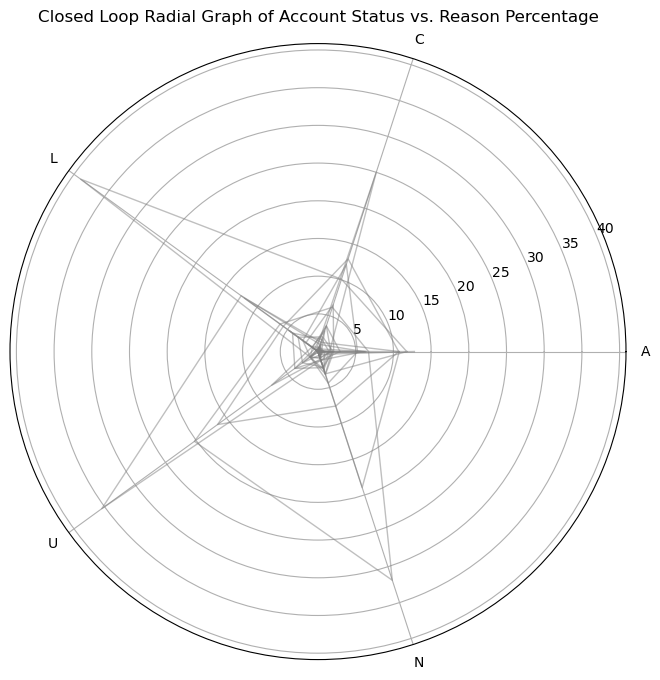

In [16]:


# Data preparation

df = df[~df['reason'].isin(['BA','IA','RV','PA','FD','PT','PP'])]

# Counting occurrences of each reason within each account status
grouped_data = df.groupby(['account_status_18_march', 'reason']).size().unstack(fill_value=0)

# Calculating the percentage of each reason within each account status
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Converting the index to a categorical type with a defined order
grouped_data_percentage.index = pd.CategoricalIndex(grouped_data_percentage.index, categories=['A', 'B', 'C', 'L', 'U', 'N'], ordered=True)

# Sorting the index to ensure the plot follows the categorical order
grouped_data_percentage = grouped_data_percentage.sort_index()

# Finding the index of the maximum value (argmax) along each row
argmax_indices = grouped_data_percentage.idxmax(axis=1)
# Finding the maximum value along each row
max_values = grouped_data_percentage.max(axis=1)

print("\nCorresponding maximum values:")
print(max_values)

print("Argmax indices for each row:")
print(argmax_indices)

# To impose periodic boundary conditions and make the lines closed loops, append the first row's data to the end
grouped_data_percentage_closed_loop = pd.concat([grouped_data_percentage, grouped_data_percentage.iloc[:1]])

# Preparing for radial plot with closed loops
theta_closed_loop = np.linspace(0, 2 * np.pi, len(grouped_data_percentage_closed_loop.index))

# Creating a radar chart for the closed loop data
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 8))



# Plotting each reason as a line on the radar chart with closed loops
for reason in grouped_data_percentage_closed_loop.columns:

   ax.plot(theta_closed_loop, grouped_data_percentage_closed_loop[reason], linewidth=1, color='gray', alpha=0.5, label=reason)

# Adjusting x-ticks to include the first label again for the closed loop
ax.set_xticks(theta_closed_loop[:-1])  # Exclude the last tick to avoid duplication
ax.set_xticklabels(grouped_data_percentage.index)

# Setting the title, adding legend and grid
ax.set_title('Closed Loop Radial Graph of Account Status vs. Reason Percentage', va='bottom')
plt.grid(True)

plt.show()



Corresponding maximum values:
account_status_18_march
A    12.779061
C    25.022686
L    38.903714
U    35.443038
N    31.892143
dtype: float64
Argmax indices for each row:
account_status_18_march
A    FR
C    CA
L    LS
U    FM
N    AT
dtype: object


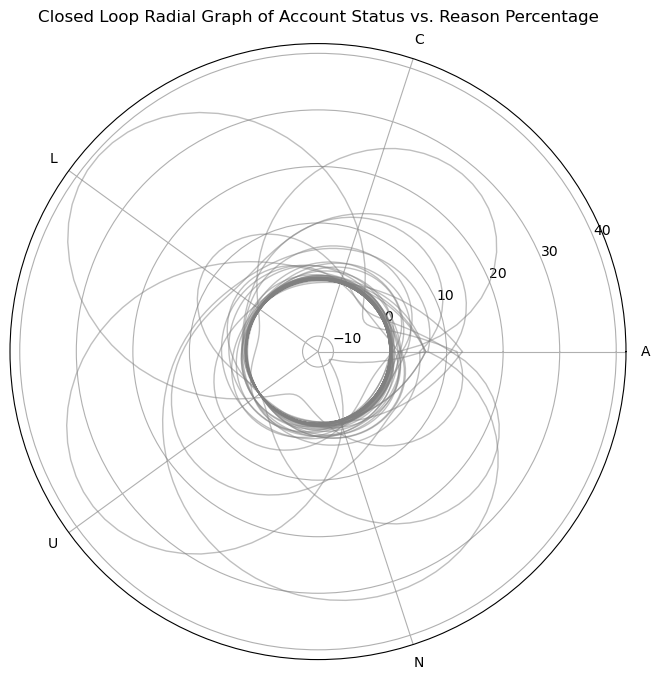

In [14]:
from scipy.interpolate import interp1d

# Data preparation

df = df[~df['reason'].isin(['BA','IA','RV','PA','FD','PT','PP'])]

# Counting occurrences of each reason within each account status
grouped_data = df.groupby(['account_status_18_march', 'reason']).size().unstack(fill_value=0)

# Calculating the percentage of each reason within each account status
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Converting the index to a categorical type with a defined order
grouped_data_percentage.index = pd.CategoricalIndex(grouped_data_percentage.index, categories=['A', 'B', 'C', 'L', 'U', 'N'], ordered=True)

# Sorting the index to ensure the plot follows the categorical order
grouped_data_percentage = grouped_data_percentage.sort_index()

# Finding the index of the maximum value (argmax) along each row
argmax_indices = grouped_data_percentage.idxmax(axis=1)
# Finding the maximum value along each row
max_values = grouped_data_percentage.max(axis=1)

print("\nCorresponding maximum values:")
print(max_values)

print("Argmax indices for each row:")
print(argmax_indices)

# To impose periodic boundary conditions and make the lines closed loops, append the first row's data to the end
grouped_data_percentage_closed_loop = pd.concat([grouped_data_percentage, grouped_data_percentage.iloc[:1]])

# Preparing for radial plot with closed loops
theta_closed_loop = np.linspace(0, 2 * np.pi, len(grouped_data_percentage_closed_loop.index))

# Create the figure and axis for plotting
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 8))

# Define the number of points for interpolation
num_interp_points = 100

# Interpolate the data for smoothing
interp_data = {}
for reason in grouped_data_percentage_closed_loop.columns:
    interp_func = interp1d(theta_closed_loop, grouped_data_percentage_closed_loop[reason], kind='cubic')
    interp_theta = np.linspace(0, 2 * np.pi, num_interp_points)
    interp_data[reason] = interp_func(interp_theta)

# Plotting each reason as a smoothed line on the radar chart with closed loops
for reason in interp_data:
    ax.plot(interp_theta, interp_data[reason], linewidth=1, color='gray', alpha=0.5, label=reason)

# Adjusting x-ticks to include the first label again for the closed loop
ax.set_xticks(theta_closed_loop[:-1])  # Exclude the last tick to avoid duplication
ax.set_xticklabels(grouped_data_percentage.index)

# Setting the title, adding legend and grid
ax.set_title('Closed Loop Radial Graph of Account Status vs. Reason Percentage', va='bottom')
plt.grid(True)

plt.show()


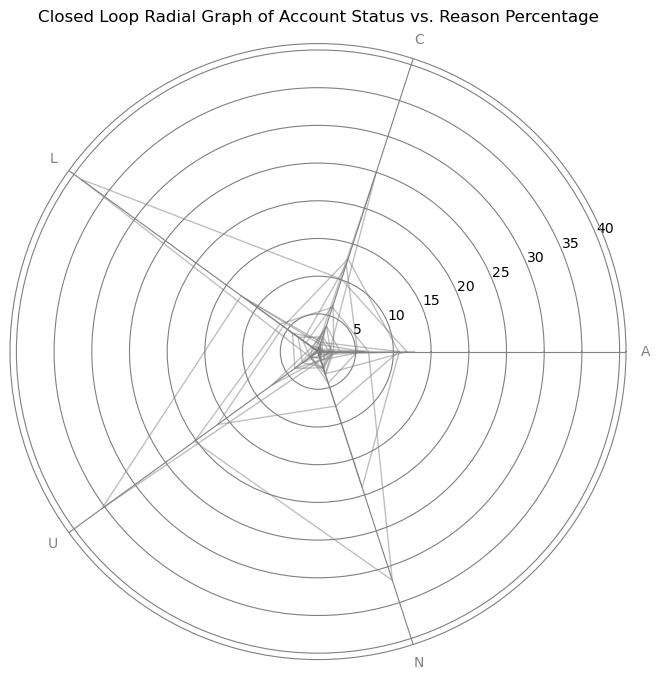

In [17]:
# Data preparation
df = df[~df['reason'].isin(['BA','IA','RV','PA','FD','PT','PP'])]

# Counting occurrences of each reason within each account status
grouped_data = df.groupby(['account_status_18_march', 'reason']).size().unstack(fill_value=0)

# Calculating the percentage of each reason within each account status
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Converting the index to a categorical type with a defined order
grouped_data_percentage.index = pd.CategoricalIndex(grouped_data_percentage.index, categories=['A', 'B', 'C', 'L', 'U', 'N'], ordered=True)

# Sorting the index to ensure the plot follows the categorical order
grouped_data_percentage = grouped_data_percentage.sort_index()

# To impose periodic boundary conditions and make the lines closed loops, append the first row's data to the end
grouped_data_percentage_closed_loop = pd.concat([grouped_data_percentage, grouped_data_percentage.iloc[:1]])

# Preparing for radial plot with closed loops
theta_closed_loop = np.linspace(0, 2 * np.pi, len(grouped_data_percentage_closed_loop.index))

# Creating a radar chart for the closed loop data
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 8))

# Plotting each reason as a line on the radar chart with closed loops
for reason in grouped_data_percentage_closed_loop.columns:
    ax.plot(theta_closed_loop, grouped_data_percentage_closed_loop[reason], linewidth=1, color='gray', alpha=0.5, label=reason)

# Adjusting x-ticks to include the first label again for the closed loop
ax.set_xticks(theta_closed_loop[:-1])  # Exclude the last tick to avoid duplication
ax.set_xticklabels(grouped_data_percentage.index, color='gray')  # Set the color of tick labels to grey

# Set the color of the outer circle to grey
ax.spines['polar'].set_color('gray')

# Set the color of the radial grid lines to grey
ax.xaxis.grid(color='gray')

# Set the color of the circular grid lines to grey
ax.yaxis.grid(color='gray')

# Setting the title, adding legend and grid
ax.set_title('Closed Loop Radial Graph of Account Status vs. Reason Percentage', va='bottom')
plt.grid(True)

plt.show()


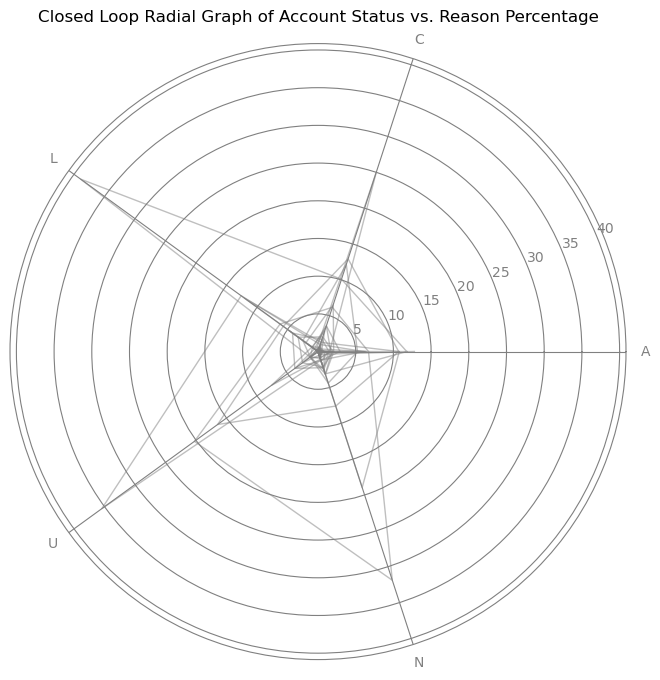

In [19]:
# Data preparation
df = df[~df['reason'].isin(['BA','IA','RV','PA','FD','PT','PP'])]

# Counting occurrences of each reason within each account status
grouped_data = df.groupby(['account_status_18_march', 'reason']).size().unstack(fill_value=0)

# Calculating the percentage of each reason within each account status
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Converting the index to a categorical type with a defined order
grouped_data_percentage.index = pd.CategoricalIndex(grouped_data_percentage.index, categories=['A', 'B', 'C', 'L', 'U', 'N'], ordered=True)

# Sorting the index to ensure the plot follows the categorical order
grouped_data_percentage = grouped_data_percentage.sort_index()

# To impose periodic boundary conditions and make the lines closed loops, append the first row's data to the end
grouped_data_percentage_closed_loop = pd.concat([grouped_data_percentage, grouped_data_percentage.iloc[:1]])

# Preparing for radial plot with closed loops
theta_closed_loop = np.linspace(0, 2 * np.pi, len(grouped_data_percentage_closed_loop.index))

# Creating a radar chart for the closed loop data
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 8))

# Plotting each reason as a line on the radar chart with closed loops
for reason in grouped_data_percentage_closed_loop.columns:
    ax.plot(theta_closed_loop, grouped_data_percentage_closed_loop[reason], linewidth=1, color='gray', alpha=0.5, label=reason)

# Adjusting x-ticks to include the first label again for the closed loop
ax.set_xticks(theta_closed_loop[:-1])  # Exclude the last tick to avoid duplication
ax.set_xticklabels(grouped_data_percentage.index, color='gray')  # Set the color of tick labels to grey

# Set the color of the outer circle to grey
ax.spines['polar'].set_color('gray')

# Set the color of the radial grid lines to grey
ax.xaxis.grid(color='gray')

# Set the color of the circular grid lines to grey
ax.yaxis.grid(color='gray')

# Setting the title, adding legend and grid
ax.set_title('Closed Loop Radial Graph of Account Status vs. Reason Percentage', va='bottom')

# Set the color of the percentage markers to grey
for label in ax.get_yticklabels():
    label.set_color('gray')

plt.grid(True)

plt.show()


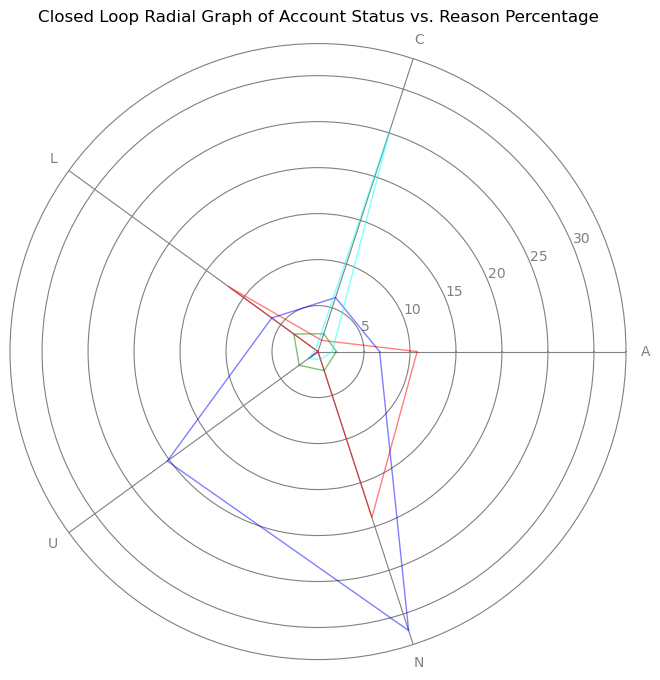

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data preparation
df = df[~df['reason'].isin(['BA','IA','RV','PA','FD','PT','PP'])]

# Counting occurrences of each reason within each account status
grouped_data = df.groupby(['account_status_18_march', 'reason']).size().unstack(fill_value=0)

# Calculating the percentage of each reason within each account status
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Converting the index to a categorical type with a defined order
grouped_data_percentage.index = pd.CategoricalIndex(grouped_data_percentage.index, categories=['A', 'B', 'C', 'L', 'U', 'N'], ordered=True)

# Sorting the index to ensure the plot follows the categorical order
grouped_data_percentage = grouped_data_percentage.sort_index()

# To impose periodic boundary conditions and make the lines closed loops, append the first row's data to the end
grouped_data_percentage_closed_loop = pd.concat([grouped_data_percentage, grouped_data_percentage.iloc[:1]])

# Preparing for radial plot with closed loops
theta_closed_loop = np.linspace(0, 2 * np.pi, len(grouped_data_percentage_closed_loop.index))

# Creating a radar chart for the closed loop data
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 8))

# Define colors for each reason
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan']

# Plotting each reason as a line on the radar chart with closed loops
for reason, color in zip(grouped_data_percentage_closed_loop.columns, colors):
    ax.plot(theta_closed_loop, grouped_data_percentage_closed_loop[reason], linewidth=1, color=color, alpha=0.5, label=reason)

# Adjusting x-ticks to include the first label again for the closed loop
ax.set_xticks(theta_closed_loop[:-1])  # Exclude the last tick to avoid duplication
ax.set_xticklabels(grouped_data_percentage.index, color='gray')  # Set the color of tick labels to grey

# Set the color of the outer circle to grey
ax.spines['polar'].set_color('gray')

# Set the color of the radial grid lines to grey
ax.xaxis.grid(color='gray')

# Set the color of the circular grid lines to grey
ax.yaxis.grid(color='gray')

# Setting the title, adding legend and grid
ax.set_title('Closed Loop Radial Graph of Account Status vs. Reason Percentage', va='bottom')

# Set the color of the percentage markers to grey
for label in ax.get_yticklabels():
    label.set_color('gray')

plt.grid(True)

plt.show()


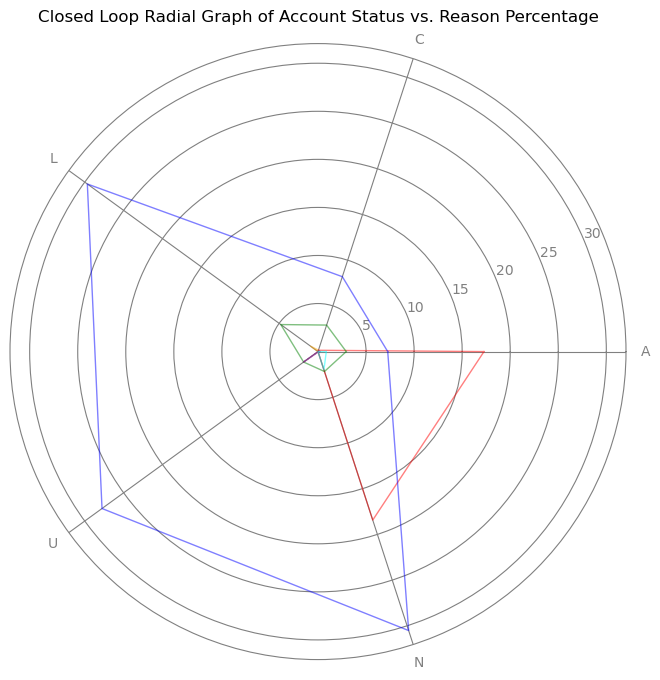

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data preparation
df = df[~df['reason'].isin(['BA','IA','RV','PA','FD','PT','PP'])]

# Counting occurrences of each reason within each account status
grouped_data = df.groupby(['account_status_13_march', 'reason']).size().unstack(fill_value=0)

# Calculating the percentage of each reason within each account status
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Converting the index to a categorical type with a defined order
grouped_data_percentage.index = pd.CategoricalIndex(grouped_data_percentage.index, categories=['A', 'B', 'C', 'L', 'U', 'N'], ordered=True)

# Sorting the index to ensure the plot follows the categorical order
grouped_data_percentage = grouped_data_percentage.sort_index()

# To impose periodic boundary conditions and make the lines closed loops, append the first row's data to the end
grouped_data_percentage_closed_loop = pd.concat([grouped_data_percentage, grouped_data_percentage.iloc[:1]])

# Preparing for radial plot with closed loops
theta_closed_loop = np.linspace(0, 2 * np.pi, len(grouped_data_percentage_closed_loop.index))

# Creating a radar chart for the closed loop data
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 8))

# Define colors for each reason
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan']

# Plotting each reason as a line on the radar chart with closed loops
for reason, color in zip(grouped_data_percentage_closed_loop.columns, colors):
    ax.plot(theta_closed_loop, grouped_data_percentage_closed_loop[reason], linewidth=1, color=color, alpha=0.5, label=reason)

# Adjusting x-ticks to include the first label again for the closed loop
ax.set_xticks(theta_closed_loop[:-1])  # Exclude the last tick to avoid duplication
ax.set_xticklabels(grouped_data_percentage.index, color='gray')  # Set the color of tick labels to grey

# Set the color of the outer circle to grey
ax.spines['polar'].set_color('gray')

# Set the color of the radial grid lines to grey
ax.xaxis.grid(color='gray')

# Set the color of the circular grid lines to grey
ax.yaxis.grid(color='gray')

# Setting the title, adding legend and grid
ax.set_title('Closed Loop Radial Graph of Account Status vs. Reason Percentage', va='bottom')

# Set the color of the percentage markers to grey
for label in ax.get_yticklabels():
    label.set_color('gray')

plt.grid(True)

plt.show()


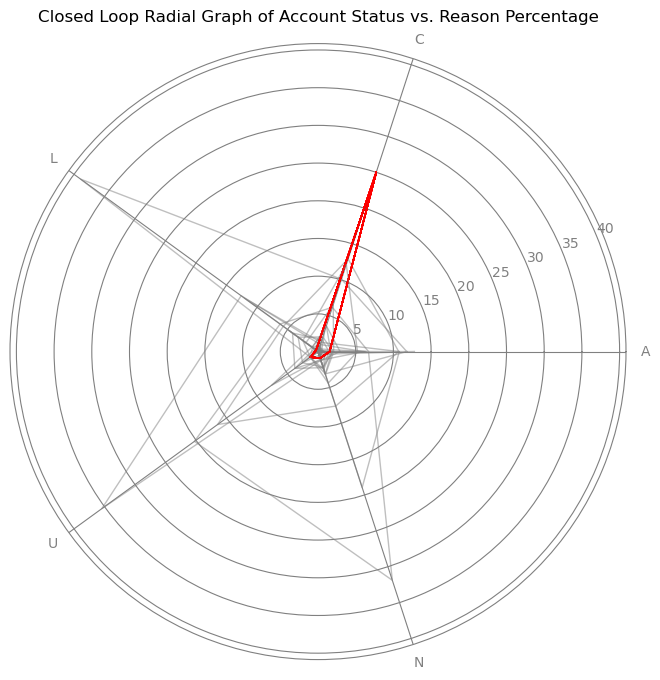

In [30]:
# Data preparation
df = df[~df['reason'].isin(['BA','IA','RV','PA','FD','PT','PP'])]

# Counting occurrences of each reason within each account status
grouped_data = df.groupby(['account_status_18_march', 'reason']).size().unstack(fill_value=0)

# Calculating the percentage of each reason within each account status
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Converting the index to a categorical type with a defined order
grouped_data_percentage.index = pd.CategoricalIndex(grouped_data_percentage.index, categories=['A', 'B', 'C', 'L', 'U', 'N'], ordered=True)

# Sorting the index to ensure the plot follows the categorical order
grouped_data_percentage = grouped_data_percentage.sort_index()

# To impose periodic boundary conditions and make the lines closed loops, append the first row's data to the end
grouped_data_percentage_closed_loop = pd.concat([grouped_data_percentage, grouped_data_percentage.iloc[:1]])

# Preparing for radial plot with closed loops
theta_closed_loop = np.linspace(0, 2 * np.pi, len(grouped_data_percentage_closed_loop.index))

# Creating a radar chart for the closed loop data
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 8))

# Plotting each reason as a line on the radar chart with closed loops
for reason in grouped_data_percentage_closed_loop.columns:
    ax.plot(theta_closed_loop, grouped_data_percentage_closed_loop[reason], linewidth=1, color='gray', alpha=0.5, label=reason)
    ax.plot(theta_closed_loop,grouped_data_percentage_closed_loop['CA'], linewidth=1, alpha=0.5, color = 'red', label=reason)

# Adjusting x-ticks to include the first label again for the closed loop
ax.set_xticks(theta_closed_loop[:-1])  # Exclude the last tick to avoid duplication
ax.set_xticklabels(grouped_data_percentage.index, color='gray')  # Set the color of tick labels to grey

# Set the color of the outer circle to grey
ax.spines['polar'].set_color('gray')

# Set the color of the radial grid lines to grey
ax.xaxis.grid(color='gray')

# Set the color of the circular grid lines to grey
ax.yaxis.grid(color='gray')

# Setting the title, adding legend and grid
ax.set_title('Closed Loop Radial Graph of Account Status vs. Reason Percentage', va='bottom')

# Set the color of the percentage markers to grey
for label in ax.get_yticklabels():
    label.set_color('gray')

plt.grid(True)

plt.show()






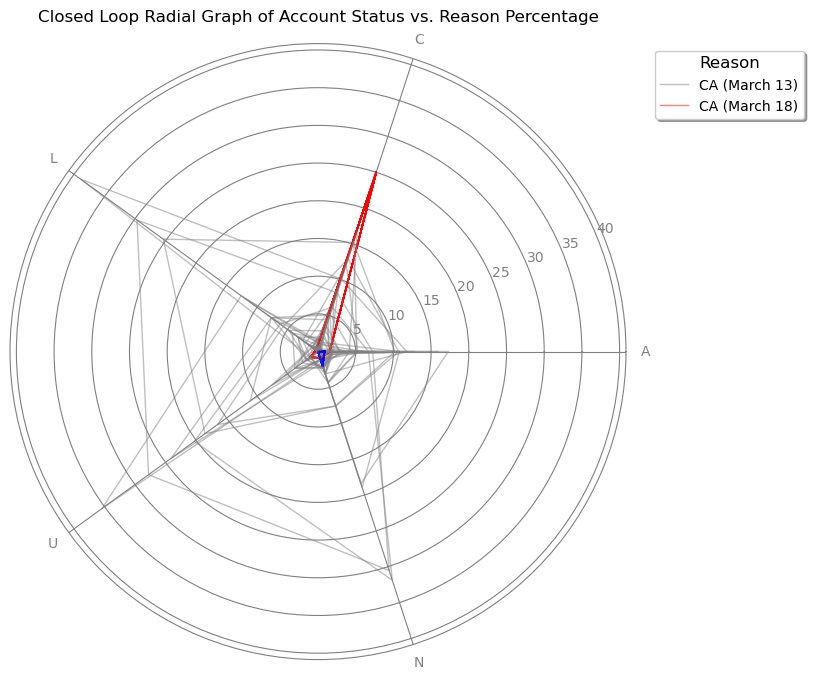

In [61]:

# Data preparation for account_status_18_march
df_18_march = df[~df['reason'].isin(['BA','IA','RV','PA','FD','PT','PP'])]
grouped_data_18_march = df_18_march.groupby(['account_status_18_march', 'reason']).size().unstack(fill_value=0)
grouped_data_percentage_18_march = grouped_data_18_march.div(grouped_data_18_march.sum(axis=1), axis=0) * 100
grouped_data_percentage_18_march.index = pd.CategoricalIndex(grouped_data_percentage_18_march.index, categories=['A', 'B', 'C', 'L', 'U', 'N'], ordered=True)
grouped_data_percentage_18_march = grouped_data_percentage_18_march.sort_index()
grouped_data_percentage_closed_loop_18_march = pd.concat([grouped_data_percentage_18_march, grouped_data_percentage_18_march.iloc[:1]])
theta_closed_loop_18_march = np.linspace(0, 2 * np.pi, len(grouped_data_percentage_closed_loop_18_march.index))

# Data preparation for account_status_13_march
df_13_march = df[~df['reason'].isin(['BA','IA','RV','PA','FD','PT','PP'])]
grouped_data_13_march = df_13_march.groupby(['account_status_13_march', 'reason']).size().unstack(fill_value=0)
grouped_data_percentage_13_march = grouped_data_13_march.div(grouped_data_13_march.sum(axis=1), axis=0) * 100
grouped_data_percentage_13_march.index = pd.CategoricalIndex(grouped_data_percentage_13_march.index, categories=['A', 'B', 'C', 'L', 'U', 'N'], ordered=True)
grouped_data_percentage_13_march = grouped_data_percentage_13_march.sort_index()
grouped_data_percentage_closed_loop_13_march = pd.concat([grouped_data_percentage_13_march, grouped_data_percentage_13_march.iloc[:1]])
theta_closed_loop_13_march = np.linspace(0, 2 * np.pi, len(grouped_data_percentage_closed_loop_13_march.index))

# Create a figure and axis for the plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 8))

# Plotting each reason as a line on the radar chart with closed loops for account_status_18_march
for reason in grouped_data_percentage_closed_loop_18_march.columns:
    ax.plot(theta_closed_loop_18_march, grouped_data_percentage_closed_loop_18_march[reason], linewidth=1, color='gray', alpha=0.5, label=reason)
    ax.plot(theta_closed_loop_18_march, grouped_data_percentage_closed_loop_18_march['CA'], linewidth=1, alpha=0.5, color='red', label='CA')
   
# Plotting each reason as a line on the radar chart with closed loops for account_status_13_march
for reason in grouped_data_percentage_closed_loop_13_march.columns:
    ax.plot(theta_closed_loop_13_march, grouped_data_percentage_closed_loop_13_march[reason], linewidth=1, color='gray', alpha=0.5, label=reason)
    ax.plot(theta_closed_loop_13_march, grouped_data_percentage_closed_loop_13_march['CA'], linewidth=1, alpha=0.5, color='blue', label='CA')
   
# Adjusting x-ticks to include the first label again for the closed loop
ax.set_xticks(theta_closed_loop_18_march[:-1])  # Exclude the last tick to avoid duplication
ax.set_xticklabels(grouped_data_percentage_18_march.index, color='gray')  # Set the color of tick labels to grey

# Set the color of the outer circle to grey
ax.spines['polar'].set_color('gray')

# Set the color of the radial grid lines to grey
ax.xaxis.grid(color='gray')

# Set the color of the circular grid lines to grey
ax.yaxis.grid(color='gray')

# Setting the title, adding legend and grid
ax.set_title('Closed Loop Radial Graph of Account Status vs. Reason Percentage', va='bottom')

# Set the color of the percentage markers to grey
for label in ax.get_yticklabels():
    label.set_color('gray')

ax.legend(handles=[ax.lines[0], ax.lines[1]], labels=['CA (March 13)', 'CA (March 18)'], loc='upper right', bbox_to_anchor=(1.3, 1), title='Reason', title_fontsize='large', fontsize='medium', shadow=True)


AttributeError: 'numpy.ndarray' object has no attribute 'get_label'

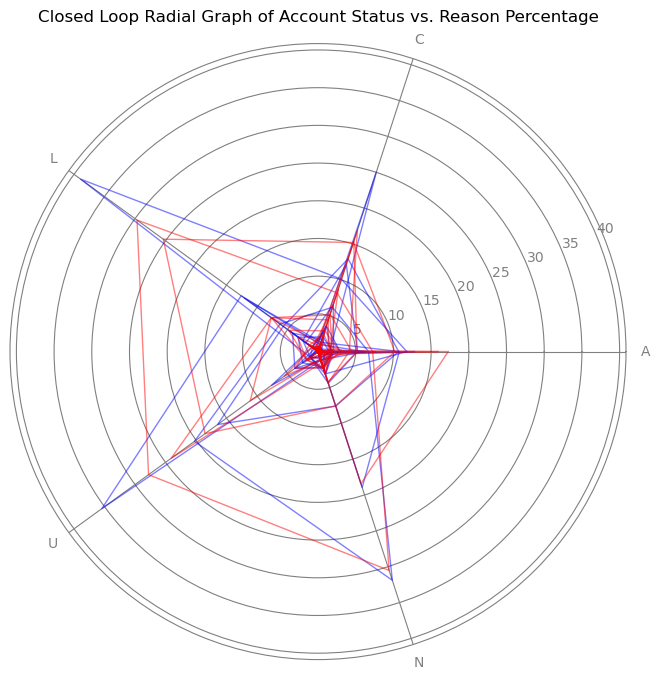

In [40]:

# Data preparation for account_status_18_march
df_18_march = df[~df['reason'].isin(['BA','IA','RV','PA','FD','PT','PP'])]
grouped_data_18_march = df_18_march.groupby(['account_status_18_march', 'reason']).size().unstack(fill_value=0)
grouped_data_percentage_18_march = grouped_data_18_march.div(grouped_data_18_march.sum(axis=1), axis=0) * 100
grouped_data_percentage_18_march.index = pd.CategoricalIndex(grouped_data_percentage_18_march.index, categories=['A', 'B', 'C', 'L', 'U', 'N'], ordered=True)
grouped_data_percentage_18_march = grouped_data_percentage_18_march.sort_index()
grouped_data_percentage_closed_loop_18_march = pd.concat([grouped_data_percentage_18_march, grouped_data_percentage_18_march.iloc[:1]])
theta_closed_loop_18_march = np.linspace(0, 2 * np.pi, len(grouped_data_percentage_closed_loop_18_march.index))

# Data preparation for account_status_13_march
df_13_march = df[~df['reason'].isin(['BA','IA','RV','PA','FD','PT','PP'])]
grouped_data_13_march = df_13_march.groupby(['account_status_13_march', 'reason']).size().unstack(fill_value=0)
grouped_data_percentage_13_march = grouped_data_13_march.div(grouped_data_13_march.sum(axis=1), axis=0) * 100
grouped_data_percentage_13_march.index = pd.CategoricalIndex(grouped_data_percentage_13_march.index, categories=['A', 'B', 'C', 'L', 'U', 'N'], ordered=True)
grouped_data_percentage_13_march = grouped_data_percentage_13_march.sort_index()
grouped_data_percentage_closed_loop_13_march = pd.concat([grouped_data_percentage_13_march, grouped_data_percentage_13_march.iloc[:1]])
theta_closed_loop_13_march = np.linspace(0, 2 * np.pi, len(grouped_data_percentage_closed_loop_13_march.index))

# Create a figure and axis for the plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 8))

# Plotting each reason as a line on the radar chart with closed loops for account_status_18_march
for reason in grouped_data_percentage_closed_loop_18_march.columns:
    ax.plot(theta_closed_loop_18_march, grouped_data_percentage_closed_loop_18_march[reason], linewidth=1, color='blue', alpha=0.5, label=reason)
    #ax.plot(theta_closed_loop_18_march, grouped_data_percentage_closed_loop_18_march['CA'], linewidth=1, alpha=0.5, color='red', label='CA')

# Plotting each reason as a line on the radar chart with closed loops for account_status_13_march
for reason in grouped_data_percentage_closed_loop_13_march.columns:
    ax.plot(theta_closed_loop_13_march, grouped_data_percentage_closed_loop_13_march[reason], linewidth=1, color='red', alpha=0.5, label=reason)
    #ax.plot(theta_closed_loop_13_march, grouped_data_percentage_closed_loop_13_march['CA'], linewidth=1, alpha=0.5, color='blue', label='CA')

# Adjusting x-ticks to include the first label again for the closed loop
ax.set_xticks(theta_closed_loop_18_march[:-1])  # Exclude the last tick to avoid duplication
ax.set_xticklabels(grouped_data_percentage_18_march.index, color='gray')  # Set the color of tick labels to grey

# Set the color of the outer circle to grey
ax.spines['polar'].set_color('gray')

# Set the color of the radial grid lines to grey
ax.xaxis.grid(color='gray')

# Set the color of the circular grid lines to grey
ax.yaxis.grid(color='gray')

# Setting the title, adding legend and grid
ax.set_title('Closed Loop Radial Graph of Account Status vs. Reason Percentage', va='bottom')

# Set the color of the percentage markers to grey
for label in ax.get_yticklabels():
    label.set_color('gray')



In [42]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 8))

# Plotting each reason as a line on the radar chart with closed loops for account_status_18_march
for reason in grouped_data_percentage_closed_loop_18_march.columns:
    ax.plot(theta_closed_loop_18_march, grouped_data_percentage_closed_loop_18_march[reason], linewidth=1, color='blue', alpha=0.5, label=reason + ' (18th March)')

# Plotting each reason as a line on the radar chart with closed loops for account_status_13_march
for reason in grouped_data_percentage_closed_loop_13_march.columns:
    ax.plot(theta_closed_loop_13_march, grouped_data_percentage_closed_loop_13_march[reason], linewidth=1, color='red', alpha=0.5, label=reason + ' (13th March)')

# Adjusting x-ticks to include the first label again for the closed loop
ax.set_xticks(theta_closed_loop_18_march[:-1])  # Exclude the last tick to avoid duplication
ax.set_xticklabels(grouped_data_percentage_18_march.index, color='gray')  # Set the color of tick labels to grey

# Set the color of the outer circle to grey
ax.spines['polar'].set_color('gray')

# Set the color of the radial grid lines to grey
ax.xaxis.grid(color='gray')

# Set the color of the circular grid lines to grey
ax.yaxis.grid(color='gray')

# Setting the title, adding legend and grid
ax.set_title('Closed Loop Radial Graph of Account Status vs. Reason Percentage', va='bottom')

# Set the color of the percentage markers to grey
for label in ax.get_yticklabels():
    label.set_color('gray')

# Adding legend for the lines
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1), title='Legend', title_fontsize='large', fontsize='medium', shadow=True)

plt.show()
```

In this modified code, I've appended the dates ('18th March' and '13th March') to the legend labels to differentiate between the two sets of data.

SyntaxError: invalid decimal literal (832008221.py, line 38)

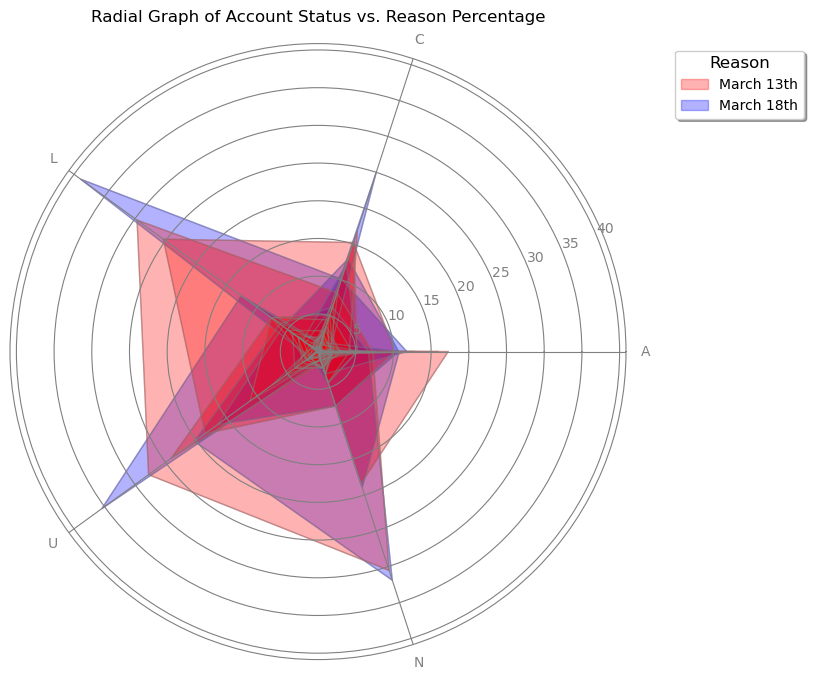

In [64]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 8))

# Plotting each reason as a line on the radar chart with closed loops for account_status_18_march
for reason in grouped_data_percentage_closed_loop_18_march.columns:
    ax.plot(theta_closed_loop_18_march, grouped_data_percentage_closed_loop_18_march[reason], linewidth=1, color='gray', alpha=0.5, label=reason)
    ax.fill(theta_closed_loop_18_march, grouped_data_percentage_closed_loop_18_march[reason], color='blue', alpha=0.3)

# Plotting each reason as a line on the radar chart with closed loops for account_status_13_march
for reason in grouped_data_percentage_closed_loop_13_march.columns:
    ax.plot(theta_closed_loop_13_march, grouped_data_percentage_closed_loop_13_march[reason], linewidth=1, color='gray', alpha=0.5, label=reason)
    ax.fill(theta_closed_loop_13_march, grouped_data_percentage_closed_loop_13_march[reason], color='red', alpha=0.3)

# Adjusting x-ticks to include the first label again for the closed loop
ax.set_xticks(theta_closed_loop_18_march[:-1])  # Exclude the last tick to avoid duplication
ax.set_xticklabels(grouped_data_percentage_18_march.index, color='gray')  # Set the color of tick labels to grey

# Set the color of the outer circle to grey
ax.spines['polar'].set_color('gray')

# Set the color of the radial grid lines to grey
ax.xaxis.grid(color='gray')

# Set the color of the circular grid lines to grey
ax.yaxis.grid(color='gray')

# Setting the title, adding legend and grid
ax.set_title('Radial Graph of Account Status vs. Reason Percentage', va='bottom')

# Set the color of the percentage markers to grey
for label in ax.get_yticklabels():
    label.set_color('gray')

import matplotlib.patches as mpatches

# Create custom legend handles with desired colors
blue_patch = mpatches.Patch(color='blue', alpha=0.3, label='March 18th')
red_patch = mpatches.Patch(color='red', alpha=0.3, label='March 13th')

# Adding legend with custom handles and labels
ax.legend(handles=[red_patch, blue_patch], loc='upper right', bbox_to_anchor=(1.3, 1), title='Reason', title_fontsize='large', fontsize='medium', shadow=True)

plt.show()

reason                          AA        AP         AT        AU        BL  \
account_status_18_march                                                       
A                        10.777521  2.001540   6.697460  0.000000  0.000000   
C                         1.285541  2.041742   6.178161  0.098306  0.113430   
L                        12.063598  3.246609   6.215255  0.033356  0.011119   
U                         0.000000  2.531646  20.253165  0.000000  1.265823   
N                        18.961861  2.177213  31.892143  0.000000  0.055680   

reason                          CA        CB        CD        CS         CT  \
account_status_18_march                                                       
A                         1.539646  0.230947  0.000000  0.000000  10.700539   
C                        25.022686  1.830006  0.196612  0.068058  12.923472   
L                         0.311319  0.055593  0.011119  0.011119   5.692684   
U                         1.265823  0.000000  0.000

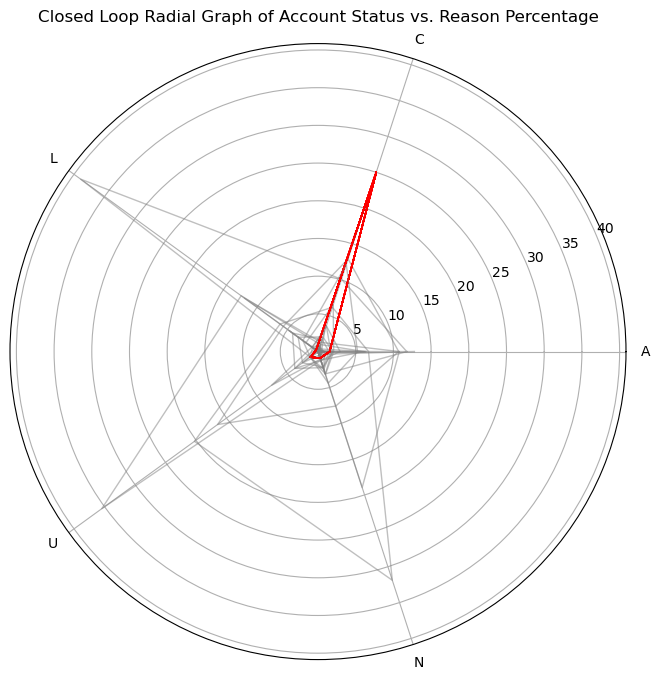

TypeError: not all arguments converted during string formatting

In [67]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline



# Data preparation
df = df[~df['reason'].isin(['BA','IA','PA','RV','FD','PT','PP'])]
# df = df[~df['reason'].isin(['BA','IA','RV','PA','FD','PT','PP'])]

# Counting occurrences of each reason within each account status
grouped_data = df.groupby(['account_status_18_march', 'reason']).size().unstack(fill_value=0)

# Calculating the percentage of each reason within each account status
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Converting the index to a categorical type with a defined order
grouped_data_percentage.index = pd.CategoricalIndex(grouped_data_percentage.index, categories=['A', 'B', 'C', 'L', 'U', 'N'], ordered=True)

# Sorting the index to ensure the plot follows the categorical order
grouped_data_percentage = grouped_data_percentage.sort_index()

# Finding the index of the maximum value (argmax) along each row
argmax_indices = grouped_data_percentage.idxmax(axis=1)
# Finding the maximum value along each row
max_values = grouped_data_percentage.max(axis=1)
print(grouped_data_percentage)

row_a = grouped_data_percentage.loc['C']
print(row_a)
column_reason_x = grouped_data_percentage['CA']
print(column_reason_x)
"""
column_reason_x.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange', 'lightgreen'])
plt.title("Percentage of Each Reason for Account Status A")
plt.xlabel("Reason")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

"""



print("\nCorresponding maximum values:")
print(max_values)

print("Argmax indices for each row:")
print(argmax_indices)

# To impose periodic boundary conditions and make the lines closed loops, append the first row's data to the end
grouped_data_percentage_closed_loop = pd.concat([grouped_data_percentage, grouped_data_percentage.iloc[:1]])

# Preparing for radial plot with closed loops
theta_closed_loop = np.linspace(0, 2 * np.pi, len(grouped_data_percentage_closed_loop.index))

# Creating a radar chart for the closed loop data
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 8))



# Plotting each reason as a line on the radar chart with closed loops
for reason in grouped_data_percentage_closed_loop.columns:

   ax.plot(theta_closed_loop, grouped_data_percentage_closed_loop[reason], linewidth=1, alpha=0.5, color = 'gray', label=reason)
   ax.plot(theta_closed_loop,grouped_data_percentage_closed_loop['CA'], linewidth=1, alpha=0.5, color = 'red', label=reason)

# Adjusting x-ticks to include the first label again for the closed loop
ax.set_xticks(theta_closed_loop[:-1])  # Exclude the last tick to avoid duplication
ax.set_xticklabels(grouped_data_percentage.index)

# Setting the title, adding legend and grid
ax.set_title('Closed Loop Radial Graph of Account Status vs. Reason Percentage', va='bottom')

plt.grid(True)

plt.show()



# Convert 'date_of_call' to datetime and then to a numerical format suitable for a radial plot
# df['date_of_call'] = pd.to_datetime(df['date_of_call'])
# df['date_num'] = date2num(df['date_of_call'])

# Group the data by 'ebill_enrolled_status_13_march' to count occurrences on each date
grouped_data = df.groupby(['reason', 'account_status_13_march']).size().reset_index(name='count')

# For simplicity in the radial chart, let's ensure the data is sorted by date
# grouped_data.sort_values('date_of_call', inplace=True)

# Convert sorted dates to numerical format again for plotting
# grouped_data['date_num'] = date2num(grouped_data['date_of_call'])

# Convert 'date_num' to radians for the radial plot
grouped_data['account_rad'] = np.deg2rad(grouped_data['account_status_13_march'] % grouped_data['account_status_13_march'].max())

# Filter data for the specified dates
specific_dates = ['2024-03-14', '2024-03-15', '2024-03-16', '2024-03-17']
data_filtered = df[df['date_of_call'].isin(pd.to_datetime(specific_dates))]

# Group the filtered data by 'ebill_enrolled_status_13_march' to count occurrences on each date
grouped_filtered_data = data_filtered.groupby(['ebill_enrolled_status_13_march', 'date_of_call']).size().reset_index(name='count')

# Assigning a specific angle to each date
angles = np.linspace(0, 2 * np.pi, len(specific_dates) + 1)
date_to_angle = dict(zip(pd.to_datetime(specific_dates), angles[:-1]))

# Mapping each 'date_of_call' in our filtered dataset to its corresponding angle
grouped_filtered_data['angle'] = grouped_filtered_data['date_of_call'].map(date_to_angle)

# To impose a periodic boundary condition and ensure the lines on the graph are closed,
# we'll add another data point for each status at the end, mirroring the first data point's count to the last.
# This way, the lines will loop back to the starting point, closing the plot.

# Adding the first data point at the end to close the loop
grouped_filtered_data_closed = grouped_filtered_data.copy()
first_data_points = grouped_filtered_data_closed.groupby(['ebill_enrolled_status_13_march']).first().reset_index()
# Adjusting the angle to complete the loop
first_data_points['angle'] = 2 * np.pi
grouped_filtered_data_closed = pd.concat([grouped_filtered_data_closed, first_data_points], ignore_index=True)

# Plotting the radial chart with closed lines
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, polar=True)

statuses = grouped_filtered_data_closed['ebill_enrolled_status_13_march'].unique()

for status in statuses:
   subset = grouped_filtered_data_closed[grouped_filtered_data_closed['ebill_enrolled_status_13_march'] == status]
   ax.plot(subset['angle'], subset['count'], label=status, color='grey')  # Setting line color to grey

# Adjusting labels for clockwise direction
ax.set_theta_direction(-1)  # Reverse the direction to make the chart clockwise
ax.set_theta_zero_location('N')  # Start from the top

angles_clockwise = np.linspace(0, 2 * np.pi, len(specific_dates) + 1, endpoint=True)
angles_clockwise_dict = dict(zip(pd.to_datetime(specific_dates), angles_clockwise[1:]))  # Skip 0 to start at 3/14
angles_clockwise_dict[pd.to_datetime(specific_dates[0])] = 0  # Ensure 3/14 starts at 0

# Assign new angles for a clockwise chart
grouped_filtered_data_closed['angle_clockwise'] = grouped_filtered_data_closed['date_of_call'].map(angles_clockwise_dict)

# Set the labels for each specific date, adjusted for clockwise direction
ax.set_xticks(angles_clockwise[:-1])

# Set the labels for each specific date, plus an additional label to close the loop
ax.set_xticks(np.linspace(0, 2 * np.pi, len(specific_dates) + 1))
ax.set_xticklabels([d.strftime('%m/%d/%y') for d in pd.to_datetime(specific_dates)] + ['03/14/24'])


# Adjusting padding for top and bottom labels
ax.tick_params(axis='x', pad=20)  # Set lower padding for top and bottom labels



# Turn the radial plot lines to light grey
# ax.spines['polar'].set_color('lightgrey')

# Turn the radial plot labels to light grey
ax.tick_params(axis='y', colors='lightgrey')

# Turn the radial plot title to light grey
ax.set_title('Your Radial Plot Title', color='lightgrey')

# Turn the x-axis label to light grey
# ax.set_xlabel('X Axis Label', color='lightgrey')

# Turn the y-axis label to light grey
# ax.set_ylabel('Y Axis Label', color='lightgrey')

# Turn any other text elements to light grey
for text in ax.get_xticklabels() + ax.get_yticklabels():
   text.set_color('lightgrey')

plt.legend(title='E-Bill Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Closed Radial Chart of E-Bill Enrollment Status by Call Date')
plt.show()

# Counting occurrences of each resolution status for each retailer
resolution_counts = df.groupby('retailer_code')['resolved'].value_counts().unstack(fill_value=0)


# Calculating total calls per retailer for bubble size
resolution_counts['total'] = resolution_counts.sum(axis=1)


# Resetting index to use retailer_code as a column
resolution_counts_reset = resolution_counts.reset_index()


# Displaying the processed DataFrame for visualization
print(resolution_counts_reset)

# Filter the DataFrame to include only entries where 'resolved' is equal to 'floor'
floor_counts = df[df['resolved'] == 'floor']

# Group the filtered DataFrame by 'retailer_code' and count the occurrences of 'floor' resolutions
floor_counts_per_retailer = floor_counts.groupby('retailer_code').size()

# Calculate the total occurrences of resolutions for each retailer
total_counts_per_retailer = resolution_counts_reset.set_index('retailer_code')['total']

# Compute the percentage of 'floor' resolutions for each retailer
floor_percentage_per_retailer = (floor_counts_per_retailer / total_counts_per_retailer) * 100

# Display the percentage of 'floor' resolutions for each retailer
print(floor_percentage_per_retailer)
plt.figure(figsize=(10, 6))
floor_percentage_per_retailer.plot(kind='bar', color='skyblue')
plt.title('Percentage of Resolutions as "Floor" by Retailer')
plt.xlabel('Retailer Code')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



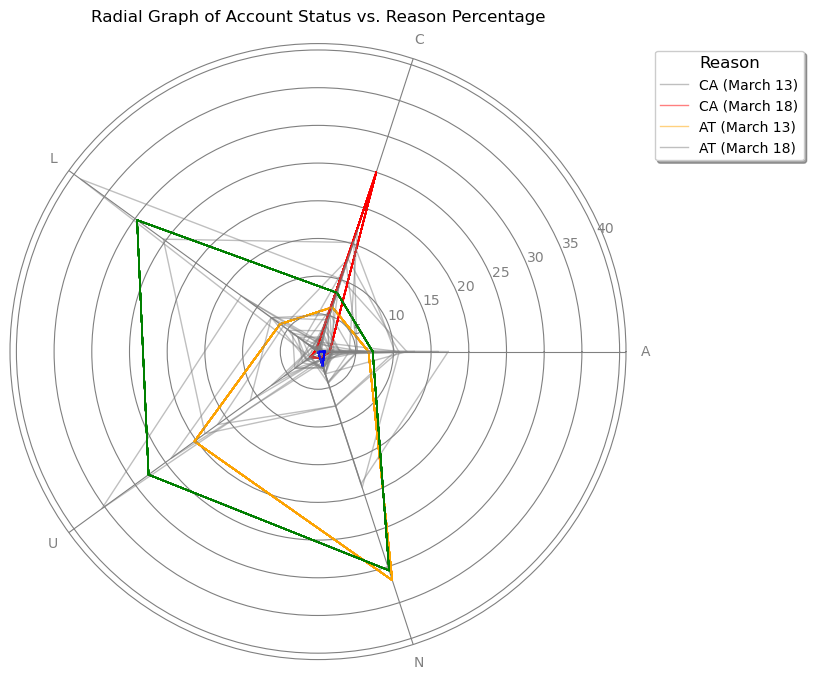

In [72]:

# Data preparation for account_status_18_march
df_18_march = df[~df['reason'].isin(['BA','IA','RV','PA','FD','PT','PP'])]
grouped_data_18_march = df_18_march.groupby(['account_status_18_march', 'reason']).size().unstack(fill_value=0)
grouped_data_percentage_18_march = grouped_data_18_march.div(grouped_data_18_march.sum(axis=1), axis=0) * 100
grouped_data_percentage_18_march.index = pd.CategoricalIndex(grouped_data_percentage_18_march.index, categories=['A', 'B', 'C', 'L', 'U', 'N'], ordered=True)
grouped_data_percentage_18_march = grouped_data_percentage_18_march.sort_index()
grouped_data_percentage_closed_loop_18_march = pd.concat([grouped_data_percentage_18_march, grouped_data_percentage_18_march.iloc[:1]])
theta_closed_loop_18_march = np.linspace(0, 2 * np.pi, len(grouped_data_percentage_closed_loop_18_march.index))

# Data preparation for account_status_13_march
df_13_march = df[~df['reason'].isin(['BA','IA','RV','PA','FD','PT','PP'])]
grouped_data_13_march = df_13_march.groupby(['account_status_13_march', 'reason']).size().unstack(fill_value=0)
grouped_data_percentage_13_march = grouped_data_13_march.div(grouped_data_13_march.sum(axis=1), axis=0) * 100
grouped_data_percentage_13_march.index = pd.CategoricalIndex(grouped_data_percentage_13_march.index, categories=['A', 'B', 'C', 'L', 'U', 'N'], ordered=True)
grouped_data_percentage_13_march = grouped_data_percentage_13_march.sort_index()
grouped_data_percentage_closed_loop_13_march = pd.concat([grouped_data_percentage_13_march, grouped_data_percentage_13_march.iloc[:1]])
theta_closed_loop_13_march = np.linspace(0, 2 * np.pi, len(grouped_data_percentage_closed_loop_13_march.index))

# Create a figure and axis for the plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 8))

# Plotting each reason as a line on the radar chart with closed loops for account_status_18_march
for reason in grouped_data_percentage_closed_loop_18_march.columns:
    ax.plot(theta_closed_loop_18_march, grouped_data_percentage_closed_loop_18_march[reason], linewidth=1, color='gray', alpha=0.5, label=reason)
    ax.plot(theta_closed_loop_18_march, grouped_data_percentage_closed_loop_18_march['CA'], linewidth=1, alpha=0.5, color='red', label='CA')
    ax.plot(theta_closed_loop_18_march, grouped_data_percentage_closed_loop_18_march['AT'], linewidth=1, alpha=0.5, color='orange', label='CA')
   
# Plotting each reason as a line on the radar chart with closed loops for account_status_13_march
for reason in grouped_data_percentage_closed_loop_13_march.columns:
    ax.plot(theta_closed_loop_13_march, grouped_data_percentage_closed_loop_13_march[reason], linewidth=1, color='gray', alpha=0.5, label=reason)
    ax.plot(theta_closed_loop_13_march, grouped_data_percentage_closed_loop_13_march['CA'], linewidth=1, alpha=0.5, color='blue', label='CA')
    ax.plot(theta_closed_loop_13_march, grouped_data_percentage_closed_loop_13_march['AT'], linewidth=1, alpha=0.5, color='green', label='CA')
    
# Adjusting x-ticks to include the first label again for the closed loop
ax.set_xticks(theta_closed_loop_18_march[:-1])  # Exclude the last tick to avoid duplication
ax.set_xticklabels(grouped_data_percentage_18_march.index, color='gray')  # Set the color of tick labels to grey

# Set the color of the outer circle to grey
ax.spines['polar'].set_color('gray')

# Set the color of the radial grid lines to grey
ax.xaxis.grid(color='gray')

# Set the color of the circular grid lines to grey
ax.yaxis.grid(color='gray')

# Setting the title, adding legend and grid
ax.set_title('Radial Graph of Account Status vs. Reason Percentage', va='bottom')

# Set the color of the percentage markers to grey
for label in ax.get_yticklabels():
    label.set_color('gray')

ax.legend(handles=[ax.lines[0], ax.lines[1],ax.lines[2],ax.lines[3]], labels=['CA (March 13)', 'CA (March 18)','AT (March 13)','AT (March 18)'], loc='upper right', bbox_to_anchor=(1.3, 1), title='Reason', title_fontsize='large', fontsize='medium', shadow=True)
